In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# pa 3 * 6 - ( 7 - ( 9 * 6 * 4 - 4 ) ) * 4_1 2 3 14 10 1 9 7 1 2 3 4 5 6 8 11 12 13_14_7

In [4]:
seq = '3 * 6 - ( 7 - ( 9 * 6 * 4 - 4 ) ) * 4'.split(' ')
seq_len = len(seq)

In [5]:
ds = '1 2 3 14 10 1 9 7 1 2 3 4 5 6 8 11 12 13'.split(' ')
syn_dis = [int(d) for d in ds]

l/r : fraction of gates that are left/right saturated

In [6]:
in_l = {i:0 for i in range(seq_len)} 
in_r = {i:0 for i in range(seq_len)}
forget_l = {i:0 for i in range(seq_len)}
forget_r = {i:0 for i in range(seq_len)}
out_l = {i:0 for i in range(seq_len)}
out_r = {i:0 for i in range(seq_len)}
ngates = 0
hdim = 100

In [7]:
i = 0
nt = 0
nc = 0
with open('feval-change_numerals-lstm_lstm-1544755453.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if line_json['type'] != 'gates':
            assert line_json['type'] == 'input'
            nc += line_json['is_correct']
            nt += 1
            continue 
        
        t = line_json['t']
        ngates += hdim
        for in_gate in line_json['i']:
            if in_gate > 0.9:
                in_r[t] += 1
            elif in_gate < 0.1:
                in_l[t] += 1
        
        for f_gate in line_json['f']:
            if f_gate > 0.9:
                forget_r[t] += 1
            elif f_gate < 0.1:
                forget_l[t] += 1
        
        for o_gate in line_json['o']:
            if o_gate > 0.9:
                out_r[t] += 1
            elif o_gate < 0.1:
                out_l[t] += 1

In [8]:
ngates = ngates/seq_len
ngates

50000.0

In [9]:
print('correct prediction%:', nc/nt)

correct prediction%: 0.168


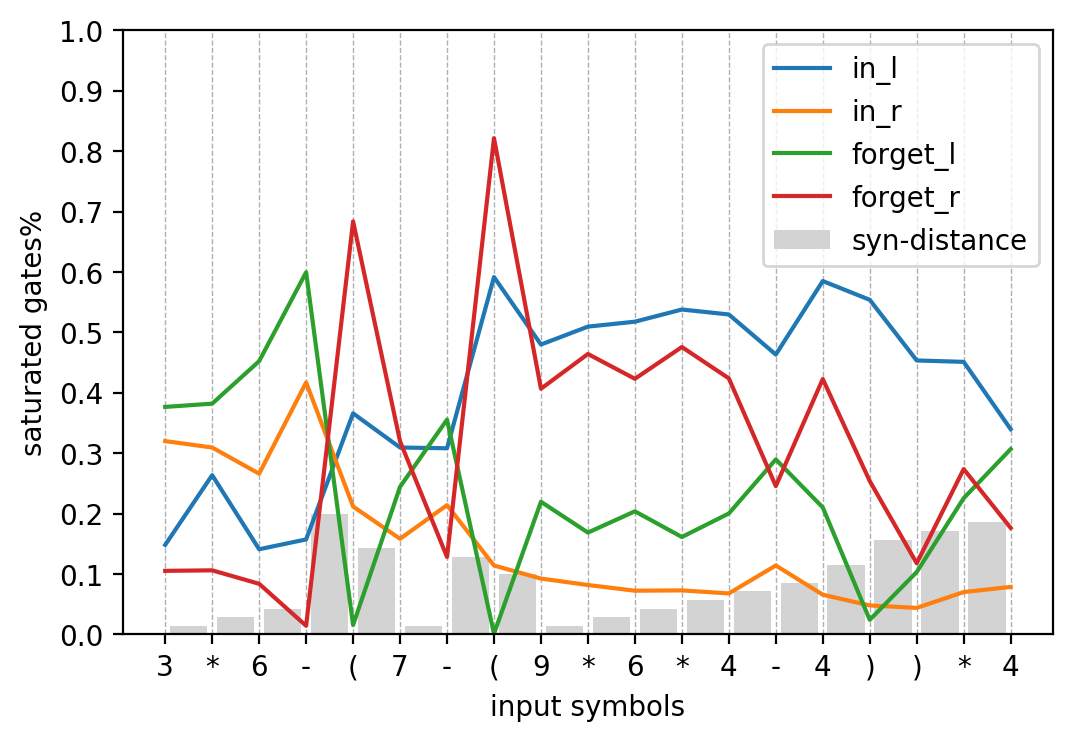

In [10]:
fig, ax = plt.subplots()
fig.dpi = 200
plt.grid(axis='x', linestyle='dashed', linewidth=0.5)
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')

plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis) * 0.2,
        label='syn-distance', color='lightgray')

plt.ylabel('saturated gates%')
plt.xlabel('input symbols')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()